<u><center><h1>HOMEWORK 1</h1></center></u>
<br></br>
<center> <h3>CS178</h3> </center>
<center> <h3>Jeremy Parnell (jmparnel)</h3> </center>
<br></br>

In [ ]:
from __future__ import division
import numpy as np 
import mltools as ml

%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(0)

# Problem 1: Python and Data Exploration

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) 
Y = iris[:,-1] 
X = iris[:,0:-1] 

## Problem 1.1

In [3]:
X.shape

(148, 4)

<p><b> - This answer shows us that there are 148 data points with 4 features each</b></p>

## Problem 1.2

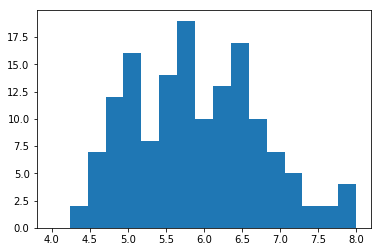

In [4]:
X1 = X[:,0]
Bins = np.linspace(4,8,18)
plt.hist(X1, bins = Bins)
plt.show()

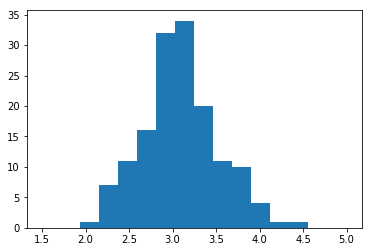

In [5]:
X2 = X[:,1]
Bins = np.linspace(1.5,5,17)
plt.hist(X2, bins = Bins)
plt.show()

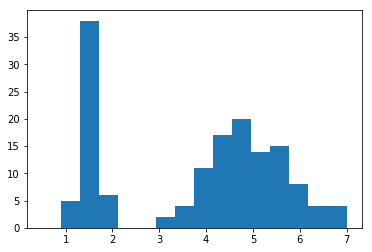

In [6]:
X3 = X[:,2]
Bins = np.linspace(.5,7,17)
plt.hist(X3, bins = Bins)
plt.show()

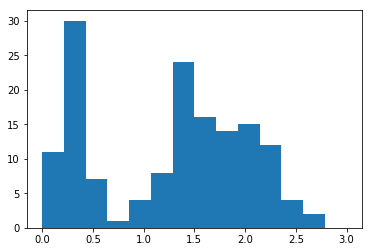

In [7]:
X4 = X[:,3]
Bins = np.linspace(0,3,15)
plt.hist(X4, bins = Bins)
plt.show()

## Problem 1.3

In [8]:
print "Feature 1: Mean = " + str(np.mean(X1, axis = 0)) + ",  Standard Deviation =  " + str(np.std(X1, axis = 0)) 
print "Feature 2: Mean = " + str(np.mean(X2, axis = 0)) + ",  Standard Deviation =  " + str(np.std(X2, axis = 0)) 
print "Feature 3: Mean = " + str(np.mean(X3, axis = 0)) + ",  Standard Deviation =  " + str(np.std(X3, axis = 0)) 
print "Feature 4: Mean = " + str(np.mean(X4, axis = 0)) + ",  Standard Deviation =  " + str(np.std(X4, axis = 0)) 

Feature 1: Mean = 5.90010376419,  Standard Deviation =  0.833402066775
Feature 2: Mean = 3.09893091689,  Standard Deviation =  0.436291838001
Feature 3: Mean = 3.81955484054,  Standard Deviation =  1.75405710934
Feature 4: Mean = 1.25255548459,  Standard Deviation =  0.758772457026


## Problem 1.4

In [9]:
colors = ['blue', 'green', 'red'] #0 = blue; 1 = green; 2 = red

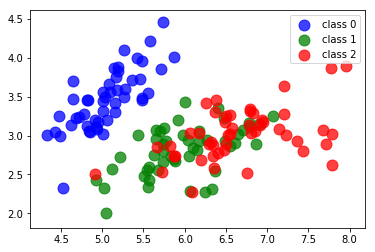

In [10]:
for i, c in enumerate(np.unique(iris[:, -1])):
    mask = np.where(iris[:, -1] == c)[0]   # Finding the right points
    plt.scatter(iris[mask, 0], iris[mask, 1], s=120, c=colors[i], alpha=0.75, label='class %d' % i)

plt.legend()
plt.show()

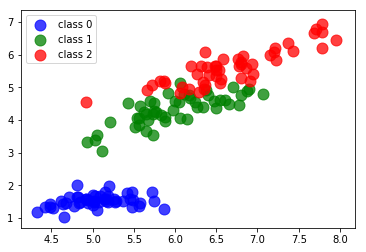

In [11]:
for i, c in enumerate(np.unique(iris[:, -1])):
    mask = np.where(iris[:, -1] == c)[0]   # Finding the right points
    plt.scatter(iris[mask, 0], iris[mask, 2], s=120, c=colors[i], alpha=0.75, label='class %d' % i)

plt.legend()
plt.show()

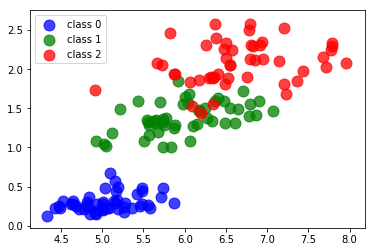

In [12]:
for i, c in enumerate(np.unique(iris[:, -1])):
    mask = np.where(iris[:, -1] == c)[0]   # Finding the right points
    plt.scatter(iris[mask, 0], iris[mask, 3], s=120, c=colors[i], alpha=0.75, label='class %d' % i)

plt.legend()
plt.show()

# Problem 2: kNN Predictions

In [13]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data 
Y = iris[:,-1]
X = iris[:,0:2]

import mltools as ml

X,Y = ml.shuffleData(X,Y);

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);

## Problem 2.1

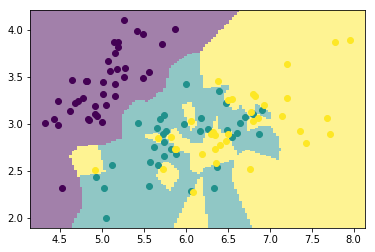

In [14]:
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, 1)
ml.plotClassify2D(knn, Xtr, Ytr)
plt.show()

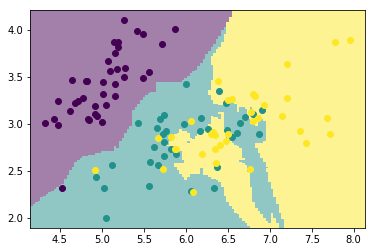

In [15]:
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, 5)
ml.plotClassify2D(knn, Xtr, Ytr)
plt.show()

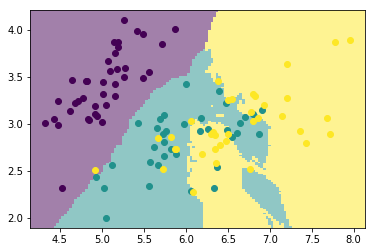

In [16]:
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, 10)
ml.plotClassify2D(knn, Xtr, Ytr)
plt.show()

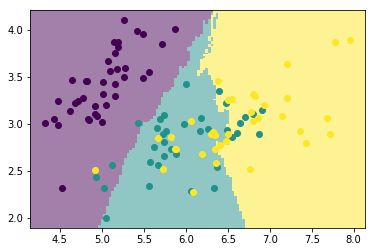

In [17]:
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, 50)
ml.plotClassify2D(knn, Xtr, Ytr)
plt.show()

## Problem 2.2

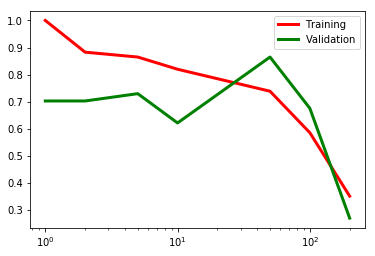

In [18]:
K = [1,2,5,10,50,100,200]

errTrain = np.zeros(7) 
errVal = np.zeros(7) 

for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(Xtr, Ytr, k)
    Ytrhat = learner.predict(Xtr)
    errTrain[i] = np.sum(np.array(Ytrhat) == np.array(Ytr))/Ytr.shape[0]
    Yvahat = learner.predict(Xva)
    errVal[i] = np.sum(np.array(Yvahat) == np.array(Yva))/Yva.shape[0]
    
# I added lw (line width) and the label. 
plt.semilogx(K, errTrain, 'r-', lw=3, label='Training')
plt.semilogx(K, errVal, 'g-', lw=3, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
plt.legend()

# And still doing this to clean the canvas.
plt.show()

<p>Based on these plots, I would recommend K to be <b><u>200</u><b/>.</p>

## Problem 2.3

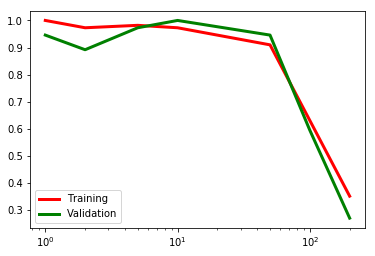

In [19]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data 
Y = iris[:,-1]
X = iris[:,0:-1]

X,Y = ml.shuffleData(X,Y);

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);

K = [1,2,5,10,50,100,200]

errTrain = np.zeros(7) 
errVal = np.zeros(7) 

for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(Xtr, Ytr, k)
    Ytrhat = learner.predict(Xtr)
    errTrain[i] = np.sum(np.array(Ytr) == np.array(Ytrhat))/Ytr.shape[0]
    Yvahat = learner.predict(Xva)
    errVal[i] = np.sum(np.array(Yva) == np.array(Yvahat))/Yva.shape[0]
      
# I added lw (line width) and the label. 
plt.semilogx(K, errTrain, 'r-', lw=3, label='Training')
plt.semilogx(K, errVal, 'g-', lw=3, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
plt.legend()

# And still doing this to clean the canvas.
plt.show()

<p>Both plots from 2.2 and 2.3 are very similar in shape. In both plots, it is noticeably clear that validation and training error remain fairly high with a low K. However, once K grows closer to 100, training and validation error both begin to decrease substantially in both plots. Thus, my recommendtaion of K would <b>NOT</b> be different</p>

# Problem 3: Naive Bayes Classifiers

## Problem 3.1

<p>
p(y) = <b>4/10</b>
<br><br>

<u>p(xi/y=1)</u>:
<ul>
 <li>- p(x1/y=1) = <b>3/4</b></li>
 <li>- p(x2/y=1) = <b>0/4</b></li>
 <li>- p(x3/y=1) = <b>3/4</b></li>
 <li>- p(x4/y=1) = <b>2/4</b></li>
 <li>- p(x5/y=1) = <b>1/4</b></li>
</ul>

<u>p(xi/y=-1)</u>:
<ul>
 <li>- p(x1/y=-1) = <b>3/6</b></li>
 <li>- p(x2/y=-1) = <b>5/6</b></li>
 <li>- p(x3/y=-1) = <b>4/6</b></li>
 <li>- p(x4/y=-1) = <b>5/6</b></li>
 <li>- p(x5/y=-1) = <b>2/6</b></li>
</ul>
</p>

## Problem 3.2

<p>
<u><b>x = (0 0 0 0 0):</b></u>
<ul>
    <li>y = 1: (4/10) x (1/4) x (4/4) x (1/4) x (2/4) x (3/4) = <b>0.009375 or 0.0094</b></li>
    <li>y = -1: (6/10) x (3/6) x (1/6) x (2/6) x (1/6) x (4/6) = <b>0.00185185185 0.0019</b></li>
    <li><b>Predicted class for x(0 0 0 0 0) is <u>+1</u></b></li>
</ul>

<u><b>x = (1 1 0 1 0):</b></u>
<ul>
    <li>y = 1: (4/10) x (3/4) x (0/4) x (1/4) x (2/4) x (3/4) = <b>0.0</b></li>
    <li>y = -1: (6/10) x (3/6) x (5/6) x (2/6) x (5/6) x (4/6) = <b>0.04629629629 or 0.0463</b></li>
    <li><b>Predicted class for x(1 1 0 1 0) is <u>-1</u></b></li>
</ul>
</p>

## Problem 3.3

<p>
<u><b>p(y = 1 | 1 1 0 1 0):</b></u><br>
<ul>
    <li>= 0 / (0 + 0.0463)</li>
    <li><b>Posterior Probability = 0.0</b></li>
<p>


## Problem 3.4

<p>- We should not use "joint" Bayes classifier because we do not have enough data to prevent overfitting

## Problem 3.5

<p>- It would be unecessary to retrain the model because all the features are independent. Thus, they are unaffected by one another</p>

# Statement of Collaboration

<p>I had met Chad Lei in person on campus and he helped me to further understand the logistics of the given code from the homework questions as well as the example code given in the discussion repository. He did not give me any code, but rather explained to me how the already given code in the homework and from discussion worked</p>